<h1>Haberman Data Set</h1>

The Haberman dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.


<p><b>
    Attribute Information:
    </b></p>
    <ol>
<li>
Age of patient at time of operation (numerical) 
    </li><li>
Patient's year of operation (year - 1900, numerical) 
    </li><li>
Number of positive axillary nodes detected (numerical) 
    </li><li>
Survival status (class attribute) 
    <ol><li>
         1 = the patient survived 5 years or longer 
        </li><li> 
         2 = the patient died within 5 year
        </li></ol>
    </li>
    </ol>



<b>Axillary lymph nodes and breast cancer</b>
    <p>
Sometimes, breast cancer can spread to the axillary lymph nodes, which are in a person's armpits.
    </p><p>

The number of axillary lymph nodes can vary from person to person, ranging from 5 nodes to more than 30.
</p><p>
When someone is diagnosed with breast cancer, knowing if cancer has spread to their axillary lymph nodes can determine the type of treatment they have, as well as their prognosis (an estimate of the future, especially about whether a patient will recover from an illness. [formal] If the cancer is caught early the prognosis is excellent.).
    </p>

In [104]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('haberman.csv', names = ['Age', 'Op_Year', 'axil_nodes_det', 'Survived_5_years_or_longer'])
df.head()

,Age,Op_Year,axil_nodes_det,Survived_5_years_or_longer
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


<p>Survived_5_years_or_longer:  convert the datatype to bool</p>
<p>'2' = False and '1' = True</p>

In [105]:
df['Survived_5_years_or_longer'] = df['Survived_5_years_or_longer'].apply(lambda x : True if (x == 1) else False )
df.head()

,Age,Op_Year,axil_nodes_det,Survived_5_years_or_longer
0,30,64,1,True
1,30,62,3,True
2,30,65,0,True
3,31,59,2,True
4,31,65,4,True


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
Age                           306 non-null int64
Op_Year                       306 non-null int64
axil_nodes_det                306 non-null int64
Survived_5_years_or_longer    306 non-null bool
dtypes: bool(1), int64(3)
memory usage: 7.5 KB


In [107]:
df.describe()

,Age,Op_Year,axil_nodes_det
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


<b>Understanding the Data</b>
<ol>    
<li>75% of the people who were treated for cancer are below the age of 60.75 years, while the lowest and highest age were 30 and 83 respectively</li><li>
  75% of the people who were treated had upto 4 positive axillary nodes detected with a high of 52  
</li><ol>

In [108]:
grouped = df.groupby('Survived_5_years_or_longer').count()

In [109]:
print("Number of Points ={}, Number of Features={}, Number of Classes={}".format(df.shape[0] , df.shape[1] - 1, grouped.shape[0]))
print("Points Per Class=")
df["Survived_5_years_or_longer"].value_counts()      

Number of Points =306, Number of Features=3, Number of Classes=2
Points Per Class=


True     225
False     81
Name: Survived_5_years_or_longer, dtype: int64

<p>haberman dataset is an <b>imbalanced dataset</b> as the number of survivors for 5 years or longer is more then number of people who died following the surgery in less than 5 years</p>

<b>Histogram and PDF of Key Features</b>

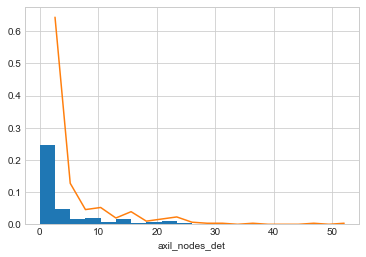

In [110]:
#histogram of axil_nodes_det in original data
plt.hist(df['axil_nodes_det'], bins=20, density=True)
counts, bin_edges = np.histogram(df['axil_nodes_det'], bins=20, density=True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);
plt.xlabel('axil_nodes_det')
plt.show()


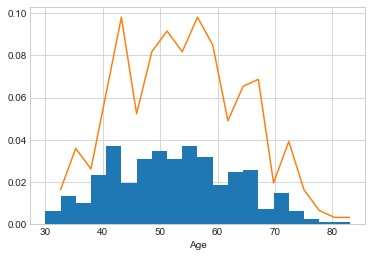

In [111]:
#histogram of Age of patients in original data
plt.hist(df['Age'], bins=20, density=True)
counts, bin_edges = np.histogram(df['Age'], bins=20, density=True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);
plt.xlabel('Age')
plt.show()



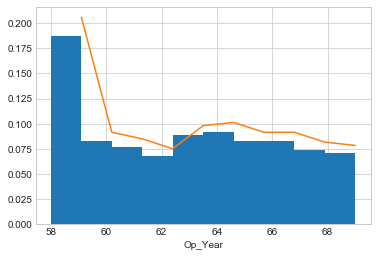

In [112]:
#histogram of Year of Operation of patients in original data
plt.hist(df['Op_Year'], bins=10, density=True)
counts, bin_edges = np.histogram(df['Op_Year'], bins=10, density=True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);
plt.xlabel('Op_Year')
plt.show()

<h1>UniVariate Analysis</h1>

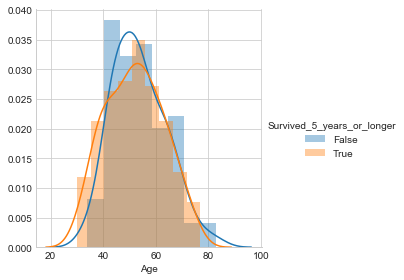

In [113]:
#Histogram of Age
sns.FacetGrid(df, hue="Survived_5_years_or_longer", size=4) \
   .map(sns.distplot, "Age") \
   .add_legend();
plt.show();



<b>Observations on Histogram of Age</b>
<ul>
    <li>
There is a large overlapped region in the Histogram of Age and hence its not easy to define a simple model for classifying the survival based only on Age. For an Age in the large intersection area between 35 to 75 one cannot decisively say  if <b>Survived_5_years_or_longer</b> is <b>true or false</b>
    </li>
    <li>
    For Age between 30-40 the survival indicator is strong, potentially indicating that the chances of survival are more for younger patients in age group 30-40 years.
    </li>
    </ul>

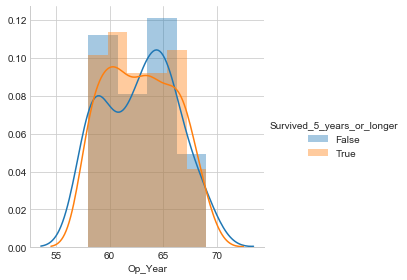

In [114]:
sns.FacetGrid(df, hue="Survived_5_years_or_longer", size=4) \
   .map(sns.distplot, "Op_Year") \
   .add_legend();
plt.show();

<b>Observation on Histogram of Op_Year</b>
<ul>
    <li>
There is a large overlapped region in the Histogram of Operation Year and hence its not easy to define a simple model for classifying the survival based only on Operation Year. For an Operation Year in the large intersection area between 57 to 68 one cannot decisively say  if <b>Survived_5_years_or_longer</b> is <b>true or false</b>
    </li>
    </ul>

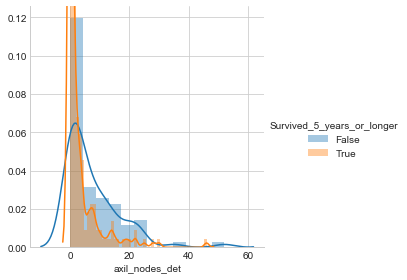

In [115]:
sns.FacetGrid(df, hue="Survived_5_years_or_longer", size=4) \
   .map(sns.distplot, "axil_nodes_det") \
   .add_legend();
plt.show();

<b>Observation on Histogram of axil_nodes_det</b>
Unlike Age and Operation Year the PDF for axil_nodes_det does not appear to be approximately normal and seems to have  an extended right tail.
<ul>
    <li>
    For axil_nodes_det between 5 and 25, the number of deaths is more then the number of survivals whereas for axil_nodes_det between 0 to 5 the number of survivals is more.
    </li>
    <li>
      The number of survivals reduces rapidly as the value of axil_nodes_det increases beyond 5. 
    </li>
    <li>
        There are outliers around axil_nodes_det value of 25-30 and around 45 where the data shows no deaths but only survivals. However the dataset itself is imbalanced and has more survivals than deaths and so it maynot be a fair conclusion to say axil_nodes_det 25-30 is specifically favoring survival.
    </li>
    </ul>

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


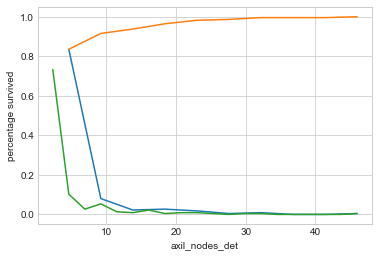

In [116]:
#CDF of survivors
df_survived = df.loc[df["Survived_5_years_or_longer"] == True];
counts, bin_edges = np.histogram(df_survived['axil_nodes_det'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.xlabel("axil_nodes_det")
plt.ylabel("percentage survived")
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

# use 20 bins instead of 10
counts, bin_edges = np.histogram(df_survived['axil_nodes_det'], bins=20, density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);

plt.show();



<b>Observations on CDF of survivors versus axil_nodes_det</b>
<p>CDF of survivors says 82% survivors had less than 6 axil_nodes_det</p>

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


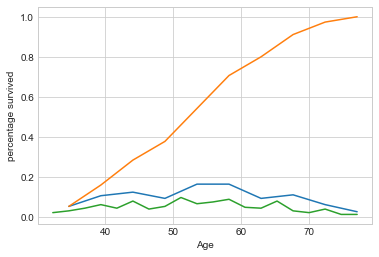

In [117]:
#CDF of survivors
df_survived = df.loc[df["Survived_5_years_or_longer"] == True];
counts, bin_edges = np.histogram(df_survived['Age'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.xlabel("Age")
plt.ylabel("percentage survived")
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

# use 20 bins instead of 10
counts, bin_edges = np.histogram(df_survived['Age'], bins=20, density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);

plt.show();

<b>Observations on CDF of survivors versus Age</b>
<p>CDF of survivors says 80% survivors had Age less than 62 years</p>

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


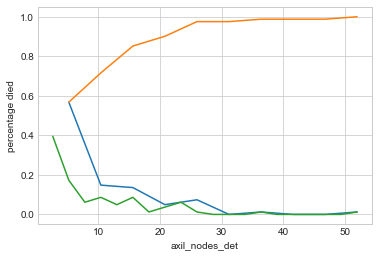

In [118]:
#CDF of people who died
df_died = df.loc[df["Survived_5_years_or_longer"] == False];
counts, bin_edges = np.histogram(df_died['axil_nodes_det'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.xlabel("axil_nodes_det")
plt.ylabel("percentage died")
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

# use 20 bins instead of 10
counts, bin_edges = np.histogram(df_died['axil_nodes_det'], bins=20, density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf)

plt.show()



<b>Observations on CDF of patients who died versus axil_nodes_det</b>
<p>CDF of people who died says 58% of people who died had less than 6 axil_nodes_det</p>
<p>However the PDF of axil_nodes_det in the original dataset is not normally distributed, 62% of the dataset has axil_nodes_det <= 6 and the remaining 38% have 6 <= axil_nodes_det <= 52                                                                                                               </p>

[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


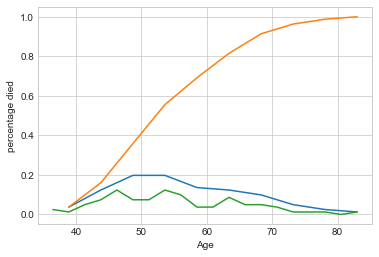

In [119]:
#CDF of people who died
df_died = df.loc[df["Survived_5_years_or_longer"] == False];
counts, bin_edges = np.histogram(df_died['Age'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.xlabel("Age")
plt.ylabel("percentage died")
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

# use 20 bins instead of 10
counts, bin_edges = np.histogram(df_died['Age'], bins=20, density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);

plt.show()

<b>Observations on CDF of patients who died versus Age</b>
<p> CDF with Age of people who died says 80% of people who died have age less than 62. </p>

<h1>Box Plots and Violin Plots</h1>
<p>
<b>Number of Axillary Nodes Determined</b>
    </p>

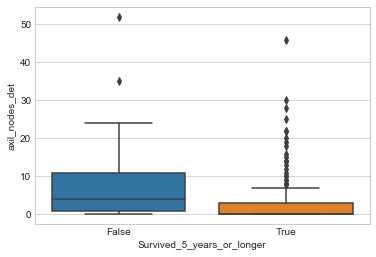

In [120]:
#Box Plots 
sns.boxplot(x='Survived_5_years_or_longer',y='axil_nodes_det', data=df)
plt.show()


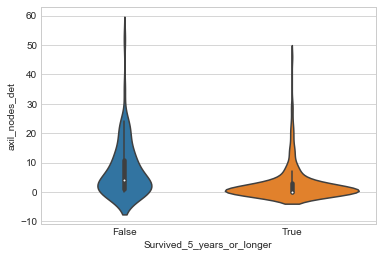

In [121]:
#Violin Plots
sns.violinplot(x="Survived_5_years_or_longer", y="axil_nodes_det", data=df, size=8)
plt.show()

<b>Observation</b>
<ul>
    <li>
    with 25% error if we set the threshold to 4 for the number of axil_nodes_det then we can set a rule that, if axil_nodes_det > 4 then Survived_5_years_or_longer = False
    </li>
    </ul>

<b>Age of Patients</b>

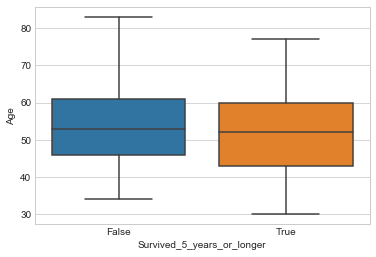

In [122]:
#Box Plots 
sns.boxplot(x='Survived_5_years_or_longer',y='Age', data=df)
plt.show()

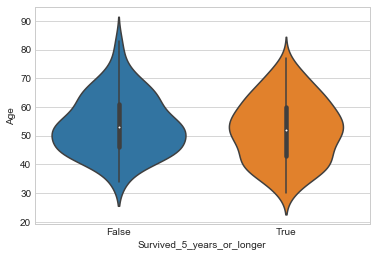

In [123]:
#Box Plots 
sns.violinplot(x='Survived_5_years_or_longer',y='Age', data=df)
plt.show()

<b>Observation</b>
<ul>
    <li>
    with 25% error if we set the threshold to 45 for the Age then we can set a rule that, if Age < 45 then Survived_5_years_or_longer = True
    </li>
    </ul>

<h1>2D Scatter Plot</h1>
<p>2D Scatter plot using Age and axil_nodes_det.</p>

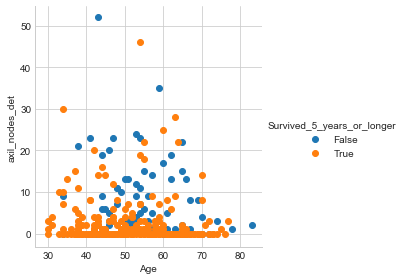

In [124]:
 
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="Survived_5_years_or_longer", size=4) \
   .map(plt.scatter, "Age", "axil_nodes_det") \
   .add_legend();
plt.show();

<b>Observations</b>
<p>The Survival rate is highest when the number of positive axillary nodes detected is low (close to zero)</p>
<p>But the 2 classes cannot be cleanly separated in this 2D scatter plot.</p>



<h1> Pair Plots</h1>

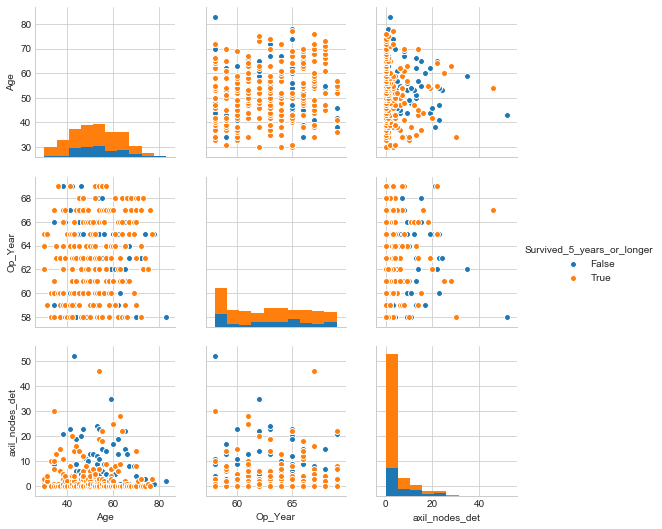

In [125]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(df, hue="Survived_5_years_or_longer", x_vars=["Age", "Op_Year", "axil_nodes_det"], y_vars=["Age", "Op_Year", "axil_nodes_det"])
plt.show()

<b>Observations</b>
<ol>
    <li>
      The Pair Plot : X=Op_Year and Y=Age, does not seem to show any specific relationship between the features  
    </li>
    <li>
      The Pair Plot : X=axil_nodes_det and Y=Op_Year, only shows that independent of Op_Year if the number of axil_nodes_det is low then patients survived. There is nothing to show things like advances in treatment with Op_year leading to higher survival rates in the presence of higher number of axil_nodes. Or atleast there is not enough data in the sample to conclude on this aspect. 
    </li>
    <li>
         The Pair Plot : X=Age and Y=axil_nodes_det, shows that for higher ages the survival rate reduces with the number of axil nodes detected and hence these two are the most useful features among all the Pair Plots. However the classes are not so cleanly separable. It also seems difficult to find a simple line or if-else condition that will enable us to classify the years of survival. 
        <ol>
        <li>
        There is one data point to suggest that if the Age is above 80 then survival rate is low irrespective of low/zero axillary nodes. But again there is not enough data to conclude on this aspect. 
            </li>
                <li>Tried a Linear Regression fit for this one and the resulting line is depicted in  the left-bottom corner plot.
    </li>
        </ol></li>
  
</ol>

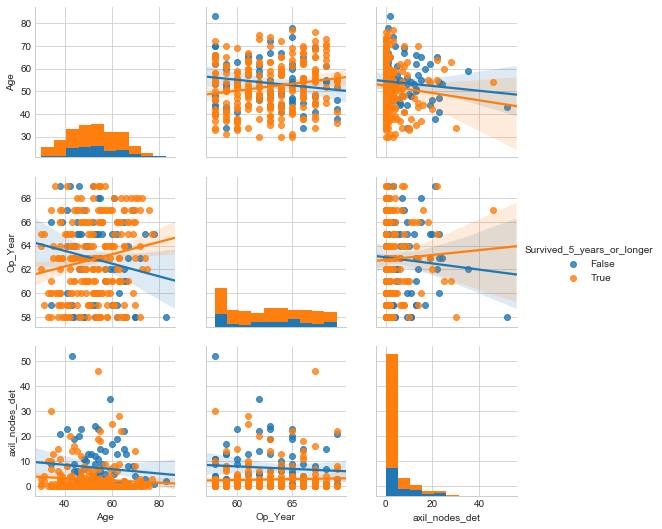

In [126]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(df, hue="Survived_5_years_or_longer", x_vars=["Age", "Op_Year", "axil_nodes_det"], y_vars=["Age", "Op_Year", "axil_nodes_det"], kind="reg")
plt.show()

<h1>Conclusion</h1>
<ol>
    <li>
        The two important features in the dataset that control the survival (more than 5 years) are Age and Number of Axillary Nodes detected
    </li>
    </ol>
    